A simple plotting example
================

In [1]:
import ee
import cartoee as cee
import cartopy.crs as ccrs

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ee.Initialize()

### Plotting an EE Image on a map

In [3]:
# get an earth engine image
srtm = ee.Image("CGIAR/SRTM90_V4")

In [4]:
# specify visualization parameters and region to map
visualization = {'min':-500,'max':3000,'bands':'elevation'}
bbox = [-180,-90,180,90]

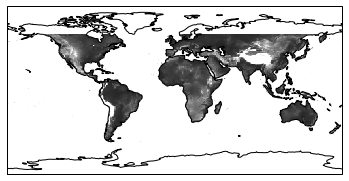

In [5]:
# plot the result using cartoee
ax = cee.getMap(srtm,region=bbox,visParams=visualization)

ax.coastlines()
plt.show()

This is a basic example where we are simply getting the image result and rendering it on a map with the correct geographic projection. Usually we want to make out maps a little prettier...

### Customizing maps

Here this example shows how we can plot an EE image with a specific colormap (from matplotlib), add a colorbar, and stylize our map with `cartopy`.

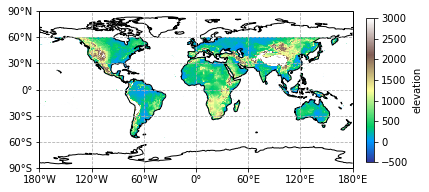

In [6]:
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

# plot the map
ax = cee.getMap(srtm,cmap='terrain',region=bbox,visParams=visualization)
# add a color bar using cartoee
cb = cee.addColorbar(ax,loc='right',cmap='terrain',visParams=visualization)

ax.coastlines()

# set gridlines and spacing
xticks = [-180,-120,-60,0,60,120,180]
yticks = [-90,-60,-30,0,30,60,90]
ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--')

# set custom formatting for the tick labels
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

# set tick labels
ax.set_xticks([-180,-120,-60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

plt.show()

Now we have a map with some aesthetics! We provided a 'cmap' keyword to our `cee.getMap` function to provide color and used the same visualization and cmap parameters to provide a colorbar that is consistent with our EE image.

### Plotting a specific region

A lot of times we don't have global results and want to make a map for a specific region. Here we can customize where we make a map and plot our EE image results.

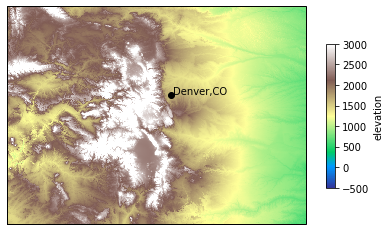

In [7]:
# specify new region over Colorado
# showing the Great Continental Divide that splits the state
newRegion = [-111,35,-100,43]

ax = cee.getMap(srtm,cmap='terrain',region=newRegion,visParams=visualization,
               dims=2000)

# add a colorbar to our map
cb = cee.addColorbar(ax,loc='right',cmap='terrain',visParams=visualization)

# add a marker for Denver,CO
ax.plot(-104.9903,39.7392,'ko')
ax.text(-104.9,39.78,'Denver,CO')

plt.show()

In this example, we took a global image (SRTM data) and clipped it down to the region required for plotting. This is helpful for showing map insets or focusing on particular regions of your results.

### Adding multiple images to a map

Many times we don't just have one image to show and `cartoee` allows for multiple images to be added to a map, and here is how.

In [8]:
# send a processing request to EE
# calcualte a hillshade from SRTM data and specify the visualization
hillshade = ee.Terrain.hillshade(srtm,azimuth=285,elevation=30)

#create new visualization parameters for the hillshade and elevation data
hsVis = {'min':25,'max':200,'palette':'000000,ffffff'}
elvVis = {'min':0,'max':3000,'opacity':0.5}

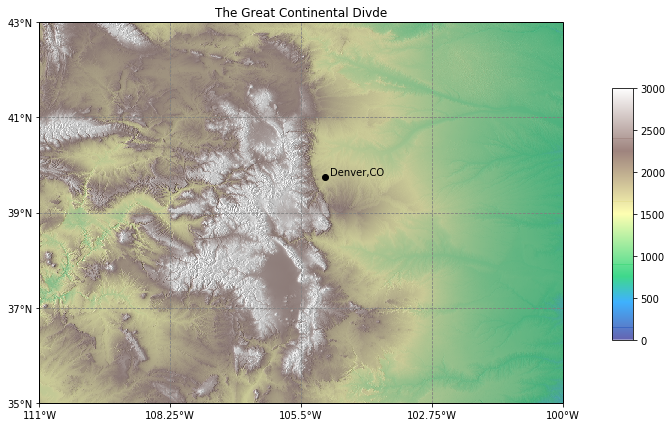

In [9]:
# set up a blank map
fig = plt.figure(figsize=(15,7))
ax = plt.subplot(projection=ccrs.PlateCarree())

# plot our hillshade on the blank map
# *note: we are using the cee.addLayer function here and 
#        passing our map into addLayer as a keyword. This 
#        will get that map with the image overlayed
ax = cee.addLayer(hillshade,ax=ax,region=newRegion
                  ,visParams=hsVis,dims=[2000,1000]) 

# plot SRTM data over the hillshade with some adjusted visualization parameters
# *note: we are passing the map variable again as a keyword 
#        into the addLayer function to stack images on each other
ax = cee.addLayer(srtm,ax=ax, cmap='terrain',region=newRegion,
              visParams=elvVis,dims=[2000,1000]) 

cax = ax.figure.add_axes([0.8,0.25,0.02,0.5])
cb = cee.addColorbar(ax,cax=cax,cmap='terrain',visParams=elvVis)

# add some styling to make our map publication ready
xticks = np.linspace(-111,-100,5)
yticks = np.linspace(35,43,5)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--',color='gray')
# set custom formatting for the tick labels
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

# set a title so we know where it is
ax.set_title('The Great Continental Divde')

# add a marker for Denver,CO
ax.plot(-104.9903,39.7392,'ko')
ax.text(-104.9,39.78,'Denver,CO')

plt.show()

Now we have a nice map show elevation with some nice hillshade styling underneath it!